In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import json 


In [2]:
#import cleaned data
movie_data=pd.read_csv("clean_data.csv")
#display data
movie_data.head()


,BUDGET,OVERVIEW,POPULARITY,REVENUE,RUNTIME,VOTE_AVERAGE,VOTE_COUNT,TAGLINE,release_year,release_month,New_Budget,New_Revenue,New_Vote_Avg
0,17000000,A soldier and his team battle hordes of post-a...,641.633,35878266,114.0,7.1,602,Escape The Apocalypse,2020,7,18020000,38030961,7
1,75000000,"Harley Quinn joins forces with a singer, an as...",361.237,201858461,109.0,7.2,6022,Mind Over Mayhem,2020,5,79500000,213969968,7
2,90000000,Marcus and Mike are forced to confront new thr...,337.346,419074646,124.0,7.2,5392,Ride together. Die together.,2020,1,95400000,444219124,7
3,42000000,"After he and his wife are murdered, marine Ray...",253.895,30234182,110.0,7.0,3216,Being a superhero is in his blood,2020,5,44520000,32048232,7
4,200000000,"In a suburban fantasy world, two teenage elf b...",279.470,103181419,102.0,7.9,3243,Their quest begineth.,2020,2,212000000,109372304,8


In [3]:
#display data info
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BUDGET         4060 non-null   int64  
 1   OVERVIEW       4060 non-null   object 
 2   POPULARITY     4060 non-null   float64
 3   REVENUE        4060 non-null   int64  
 4   RUNTIME        4060 non-null   float64
 5   VOTE_AVERAGE   4060 non-null   float64
 6   VOTE_COUNT     4060 non-null   int64  
 7   TAGLINE        4060 non-null   object 
 8   release_year   4060 non-null   int64  
 9   release_month  4060 non-null   int64  
 10  New_Budget     4060 non-null   int64  
 11  New_Revenue    4060 non-null   int64  
 12  New_Vote_Avg   4060 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 412.5+ KB


In [4]:
#display described data
movie_data.describe()

,BUDGET,POPULARITY,REVENUE,RUNTIME,VOTE_AVERAGE,VOTE_COUNT,release_year,release_month,New_Budget,New_Revenue,New_Vote_Avg
count,4.060000e+03,4060.000000,4.060000e+03,4060.000000,4060.000000,4060.000000,4060.000000,4060.000000,4.060000e+03,4.060000e+03,4060.000000
mean,4.257164e+07,22.130783,1.241408e+08,110.315025,6.394852,2119.224384,2006.484729,6.856404,5.853836e+07,1.684264e+08,6.387685
std,4.511004e+07,24.741996,2.055966e+08,19.370470,0.853987,3009.393222,7.882140,3.471465,5.832468e+07,2.649834e+08,0.895609
min,1.100000e+06,0.600000,1.007962e+06,48.000000,0.000000,0.000000,1990.000000,1.000000,1.367080e+06,1.187535e+06,0.000000
25%,1.250000e+07,11.267500,1.661978e+07,97.000000,5.900000,357.750000,2000.000000,4.000000,1.744800e+07,2.356708e+07,6.000000
50%,2.700000e+07,15.905000,5.169134e+07,107.000000,6.400000,997.000000,2007.000000,7.000000,3.879985e+07,7.327136e+07,6.000000
75%,5.500000e+07,24.784500,1.411076e+08,121.000000,7.000000,2531.500000,2013.000000,10.000000,8.039960e+07,1.975225e+08,7.000000
max,3.800000e+08,641.633000,2.797801e+09,254.000000,8.700000,27342.000000,2020.000000,12.000000,4.722640e+08,3.781250e+09,9.000000


In [5]:
def Bi_Variate(data, var1: str, var2: str):
    jointDF = pd.concat([data[var1], data[var2]], axis = 1)
    # Draw jointplot of the two variables in the joined dataframe
    f = plt.figure(figsize=(24, 4))
    sb.jointplot(data = jointDF, x = var1, y = var2, height = 12)
    
   
   
def Correlation(data, var1: str, var2: str):
    jointDF = pd.concat([data[var1], data[var2]], axis = 1)
    f = plt.figure(figsize=(8, 4))
    sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
    
    
def Uni_Variate(data):
    
    data.describe()
    # Set up matplotlib figure with three subplots
    f, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Plot the basic uni-variate figures
    sb.violinplot(data = data, orient = "h", ax = axes[0])
    sb.boxplot(data = data, orient = "h", ax = axes[1])
    sb.histplot(data = data, ax = axes[2])

def PlotHist(data, var1: str, var2: str):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,8))
    sb.histplot(data[var1], ax=ax1, kde=True)
    sb.histplot(data[var2], ax=ax2, kde=True)



def ViolinPlot(movie_data, var: str):
    #Set up matplotlib figure with three subplots
    f, axes = plt.subplots(figsize=(24, 6))

    # Plot the basic uni-variate figures
    sb.violinplot(data=movie_data[var], orient = "h")
    
def fixskew(data):
    data = np.log(data + 1)

    f = plt.figure(figsize=(15,6))

    sb.histplot(data, kde=True)

# Popular keywords in OVERVIEW and TAGLINE

In [6]:
movie_data['TAGLINE'] = movie_data['TAGLINE'].astype('str')
movie_data['OVERVIEW'] = movie_data['OVERVIEW'].astype('str')
overview=' '.join(movie_data["OVERVIEW"])
tagline = ' '.join(movie_data['TAGLINE'])

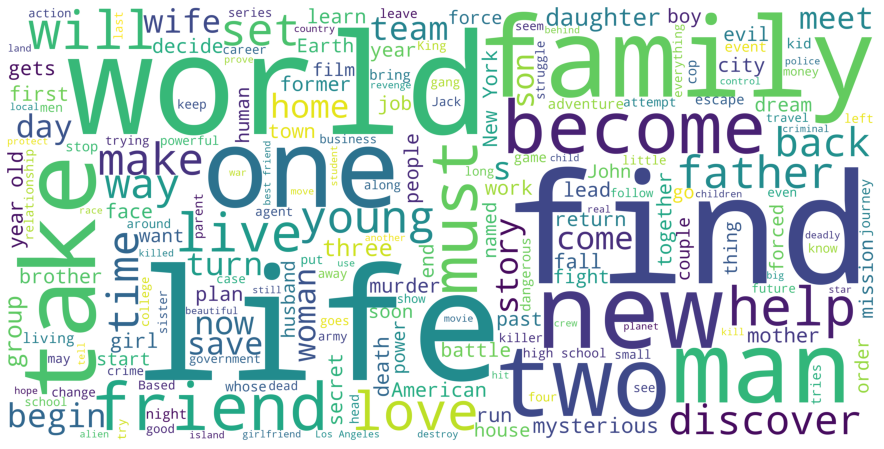

In [7]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

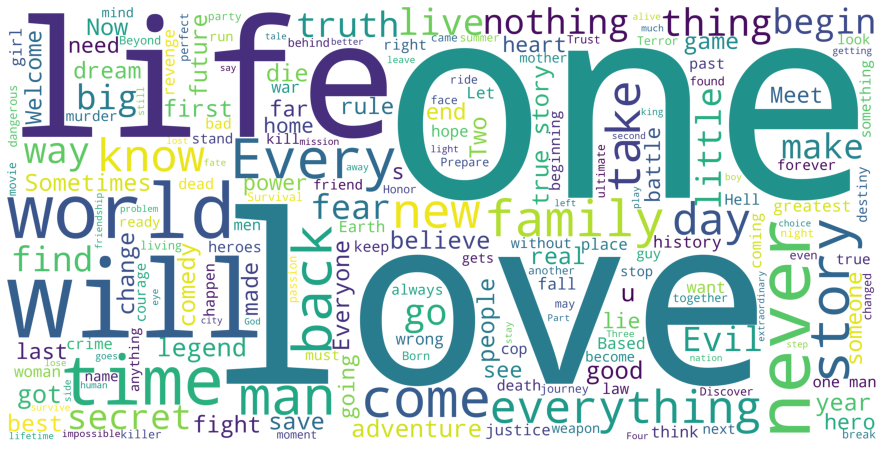

In [8]:
tagline_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(tagline)
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud)
plt.axis('off')
plt.show()

# Release Month and Years

<AxesSubplot:title={'center':'Year Vs Movie Number'}, xlabel='release_year,release_year', ylabel='Movie Number'>

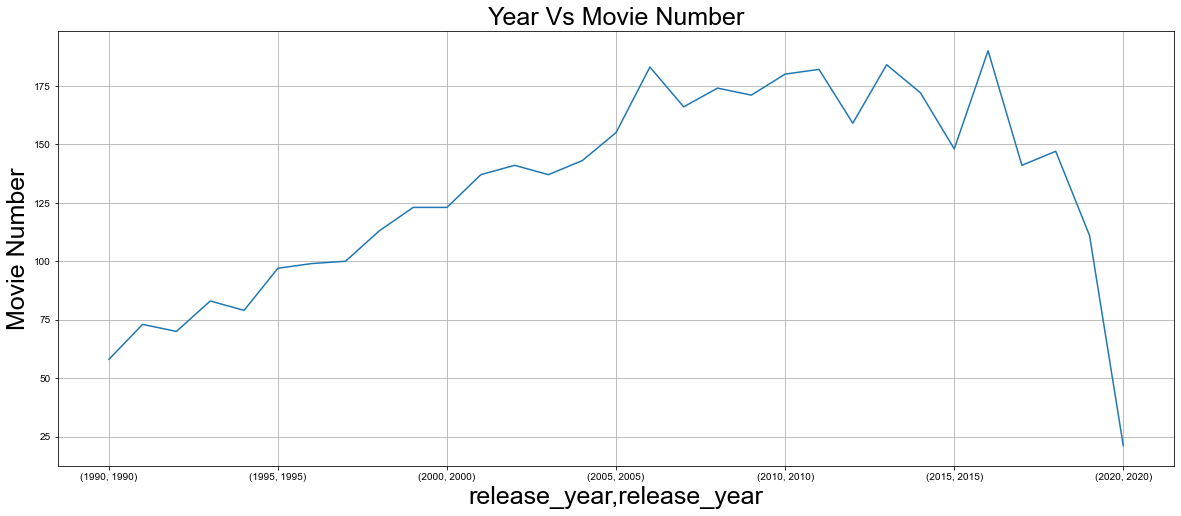

In [9]:
# Setup the size, title and labels of the figure
f = plt.figure(figsize=(20, 8))
plt.title("Year Vs Movie Number",fontsize = 25)
plt.xlabel('Release year',fontsize = 25)
plt.ylabel('Movie Number',fontsize = 25)
sb.set(style="darkgrid", font_scale=1.5)

movie_data.groupby('release_year')['release_year'].value_counts().plot()

<AxesSubplot:title={'center':'Release Month Vs Revenue'}, xlabel='release_month', ylabel='New_Revenue'>

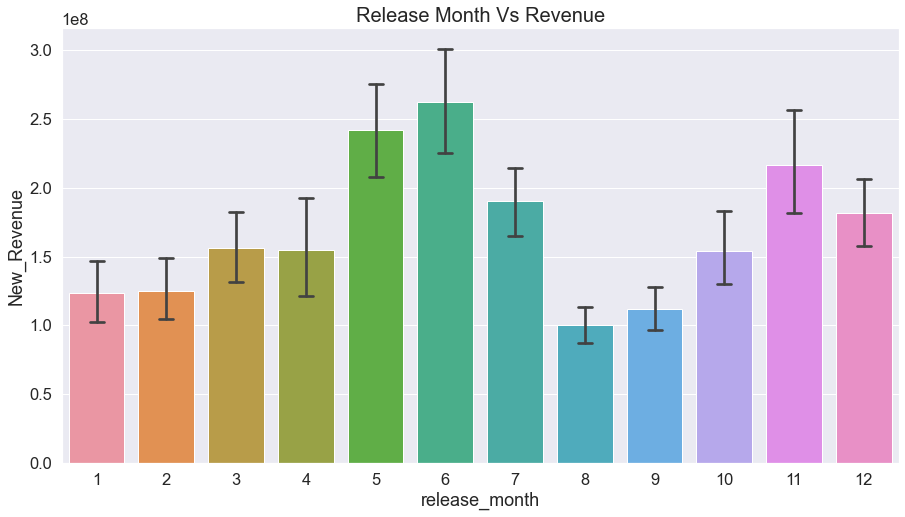

In [10]:
# Set the figure size, labels and style sheet
f = plt.figure(figsize=(15, 8))
plt.title("Release Month Vs Revenue", fontsize = 20)
plt.xlabel('Release Month',fontsize = 18)
plt.ylabel('Revenue',fontsize = 18)
sb.set(style="whitegrid", font_scale=1.5)

# Plot with error bars
sb.barplot(x = movie_data['release_month'], y = movie_data['New_Revenue'], capsize=.2)

#Adjust right skew

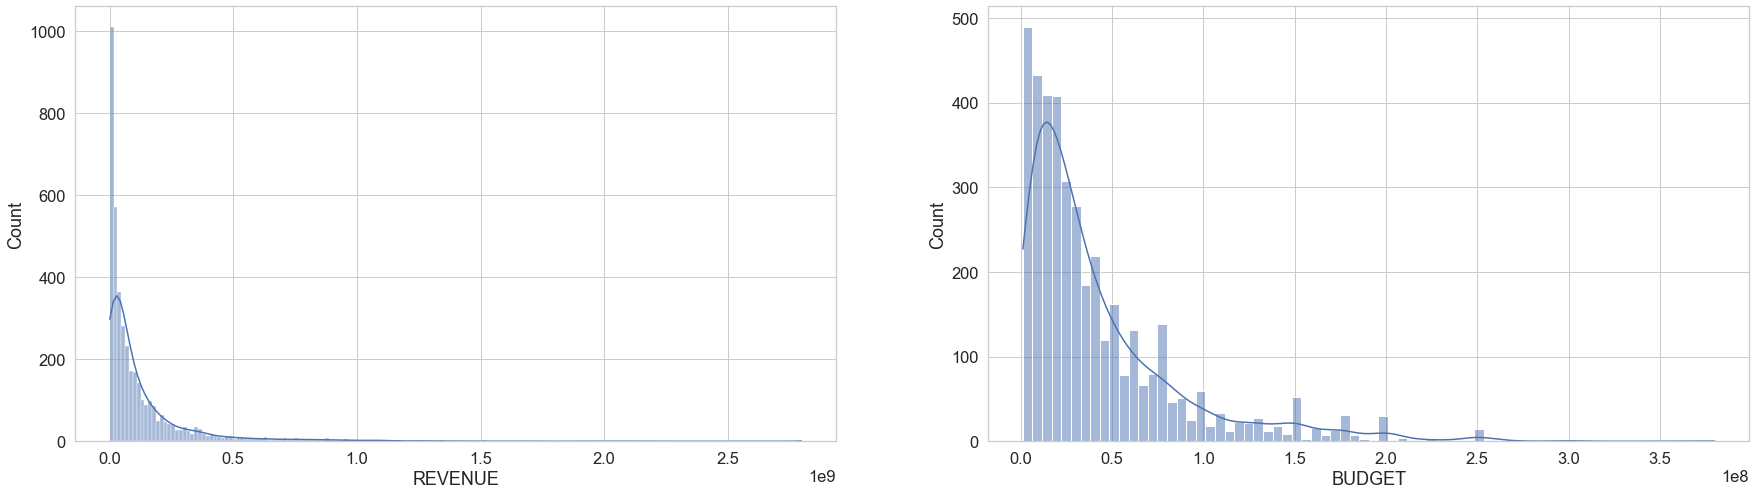

In [11]:
PlotHist(movie_data, "REVENUE", "BUDGET")

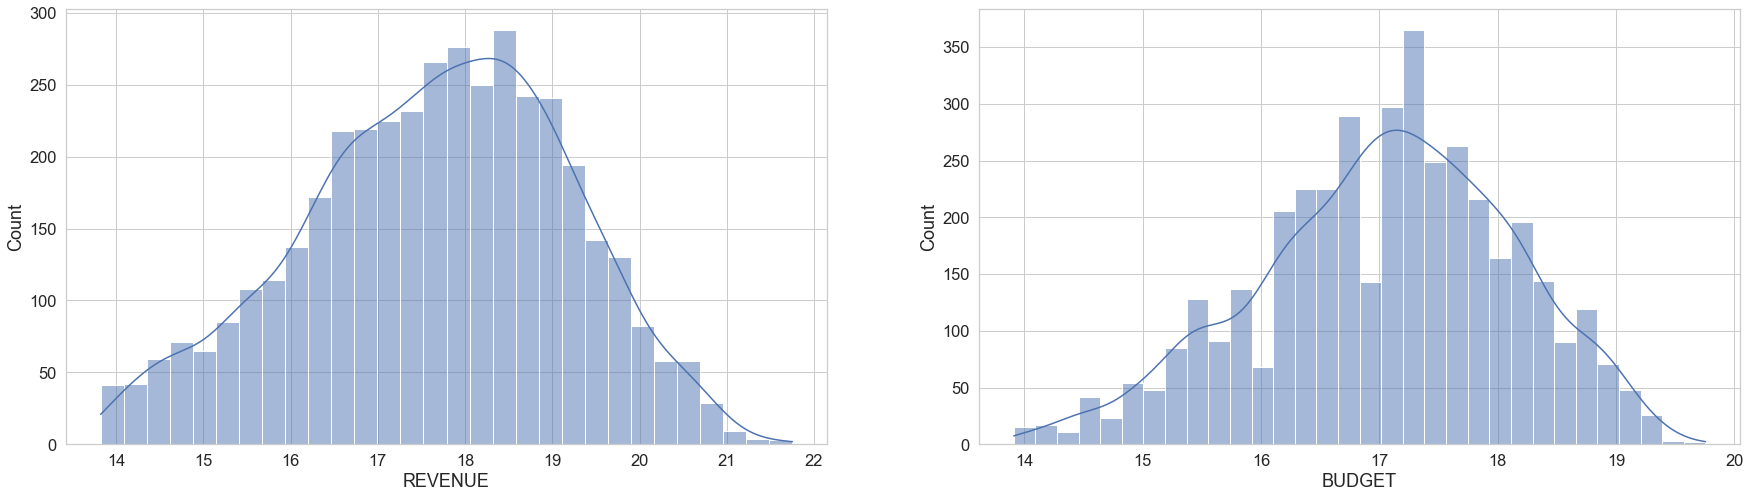

In [12]:
movie_data["BUDGET"] = np.log(movie_data["BUDGET"] + 1)
movie_data["REVENUE"] = np.log(movie_data["REVENUE"] + 1)

PlotHist(movie_data, "REVENUE", "BUDGET")

# PREDICTING REVENUE USING BUDGET

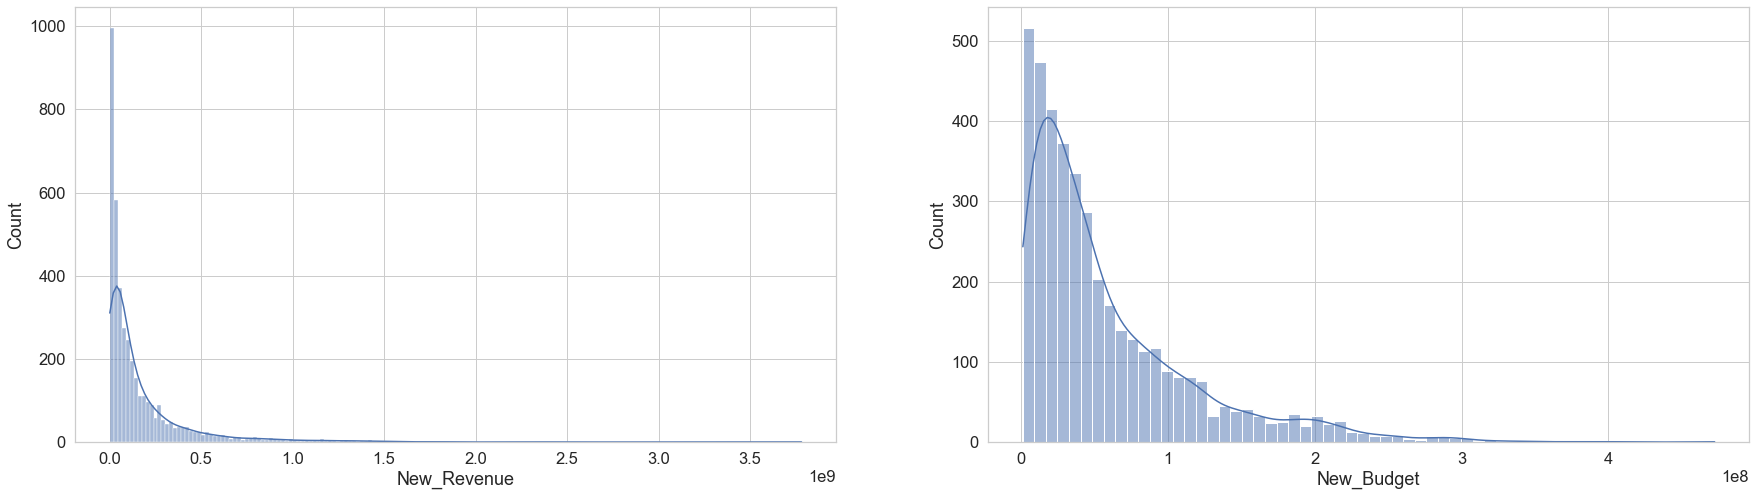

In [13]:
PlotHist(movie_data, "New_Revenue", "New_Budget")

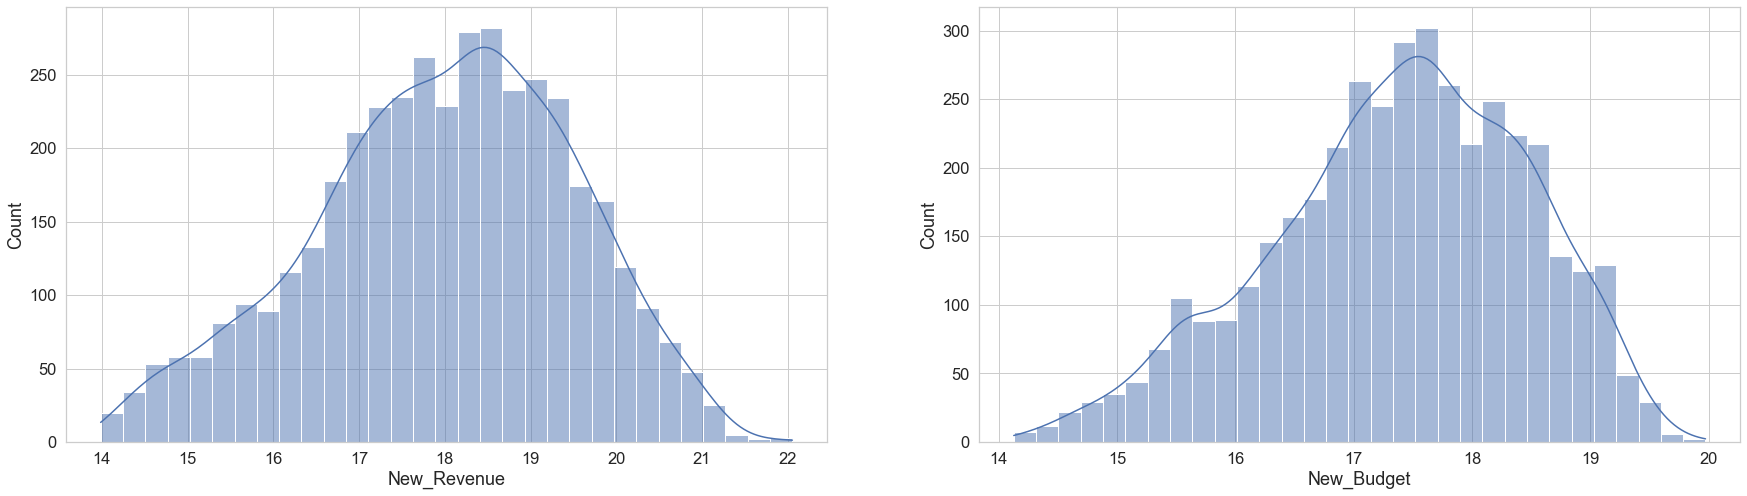

In [14]:
movie_data["New_Budget"] = np.log(movie_data["New_Budget"] + 1)
movie_data['New_Revenue'] = np.log(movie_data['New_Revenue'] + 1)

PlotHist(movie_data, 'New_Revenue', "New_Budget")

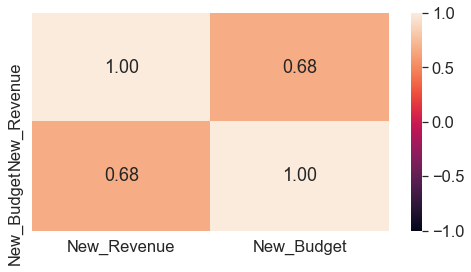

In [15]:
#Correlation between 2 variable/column
Correlation(movie_data, 'New_Revenue', "New_Budget")

<Figure size 1728x288 with 0 Axes>

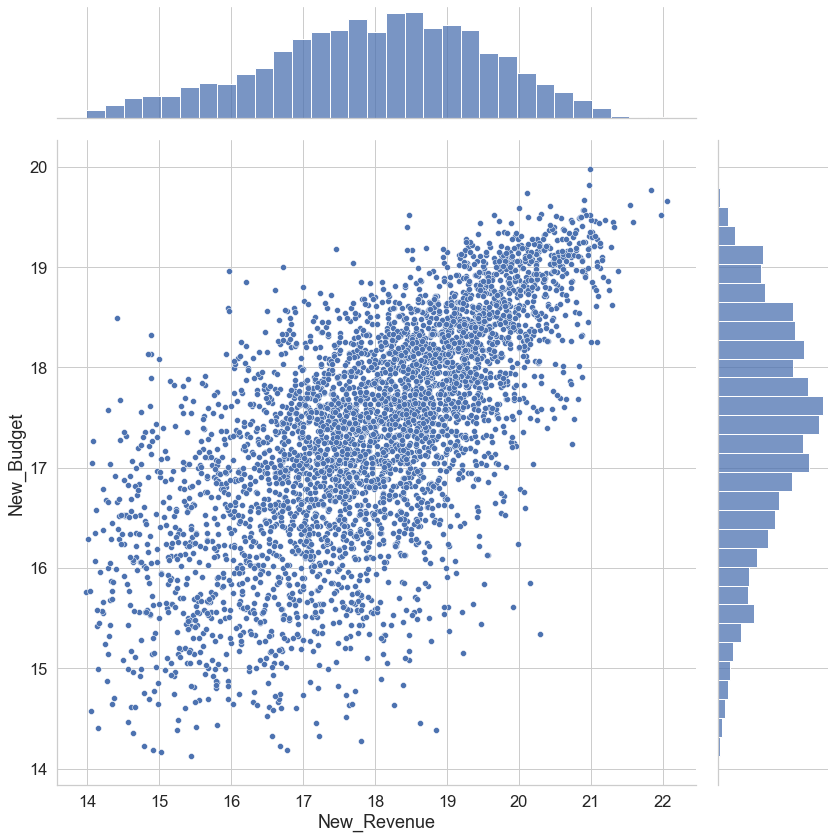

In [16]:
Bi_Variate(movie_data, 'New_Revenue', "New_Budget")

# LINEAR REGRESSION FOR REVENUE AND BUDGET

In [17]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
LinearReg = LinearRegression()
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(movie_data['New_Revenue'])
X = pd.DataFrame(movie_data["New_Budget"])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (3045, 1) (3045, 1)
Test Set  : (1015, 1) (1015, 1)


In [18]:
LinearReg.fit(X_train, y_train)
print('Intercept : b = ', LinearReg.intercept_)
print('Coefficients : a = ', LinearReg.coef_)

Intercept : b =  [1.66015323]
Coefficients : a =  [[0.93930337]]


In [19]:
# Formula for the Regression line
regline_x = X_train
regline_y = LinearReg.intercept_ + LinearReg.coef_ * X_train



# Goodness of Fit of the Linear Regression Model

Performance on Train Data:
Explained Variance (R^2) 	: 0.45461628380381325
Mean Squared Error (MSE) 	: 1.2591442396008536


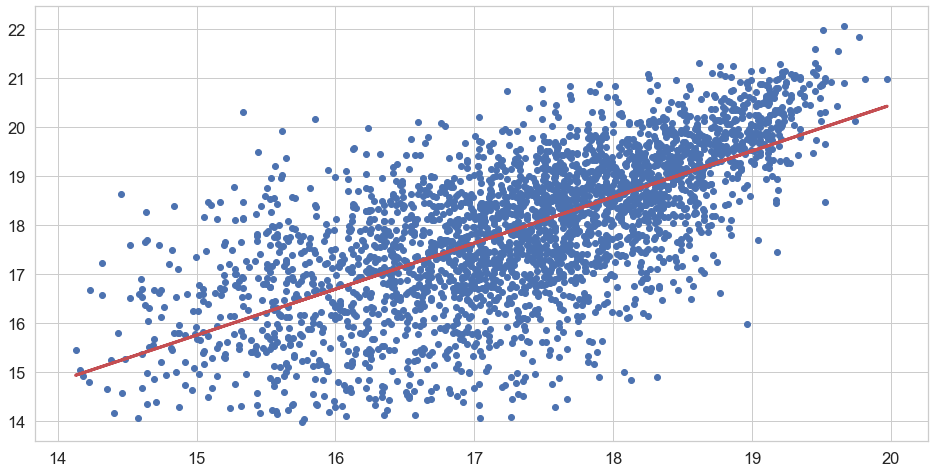

In [20]:
# Explained Variance in simply the "Score"
print("Performance on Train Data:")
print("Explained Variance (R^2) \t:", LinearReg.score(X_train, y_train))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = LinearReg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Goodness of Fit of the Ridge Regression Model

Performance on Train Data:
Mean Squared Error (MSE) on test 	: 1.259144319545772
Explained Variance (R^2) on test 	: 0.4546162491765995

Performance on Test Data:
Mean Squared Error (MSE) on test 	: 1.2478145019437803
Explained Variance (R^2) on test 	: 0.46625093991040467


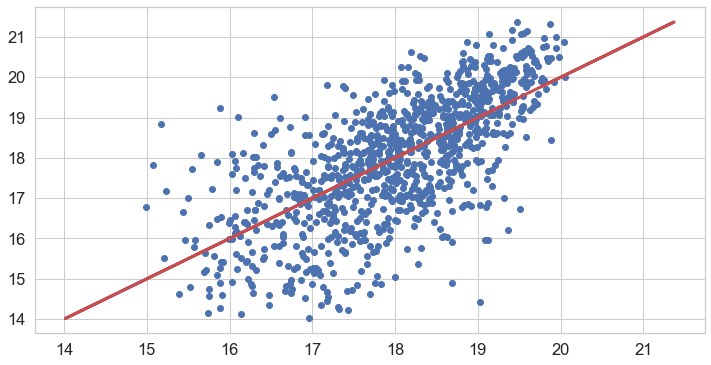

In [21]:
from sklearn.linear_model import Ridge

# define model
model_RR = Ridge(alpha=1.0)

# fit model
model_RR.fit(X_train, y_train)

# make a prediction
prediction_RR_test = model_RR.predict(X_test)
prediction_RR_train = model_RR.predict(X_train)

# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_RR_train))
print("Explained Variance (R^2) on test \t:", model_RR.score(X_train, y_train))
print("")

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_RR_test))
print("Explained Variance (R^2) on test \t:", model_RR.score(X_test, y_test))

# plot graph
f = plt.figure(figsize=(12,6))
plt.scatter(prediction_RR_test,y_test)
plt.plot(y_test,y_test,'r-',linewidth=3)
plt.show()

# Goodness of Fit of the LASSO Regression Model

Performance on Train Data:
Mean Squared Error (MSE) on test 	: 2.0997521126366863
Explained Variance (R^2) on test 	: 0.09051673806361782

Performance on Test Data:
Mean Squared Error (MSE) on test 	: 2.125003404979749
Explained Variance (R^2) on test 	: 0.09103591252681864


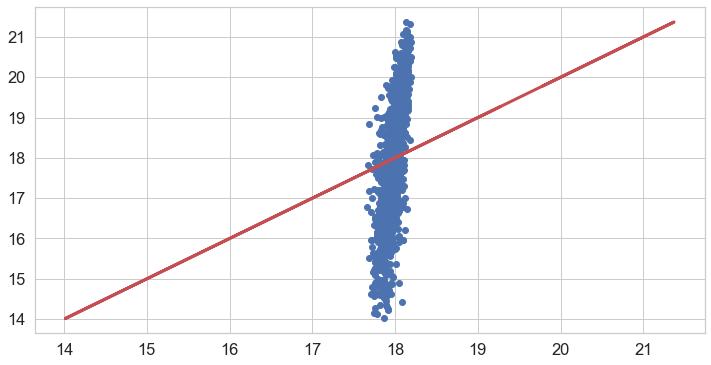

In [22]:
from sklearn.linear_model import Lasso

# define model
model_LAR = Lasso(alpha=1.0)

# fit model
model_LAR.fit(X_train, y_train)

# make a prediction
prediction_LAR_test = model_LAR.predict(X_test)
prediction_LAR_train = model_LAR.predict(X_train)

# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_LAR_train))
print("Explained Variance (R^2) on test \t:", model_LAR.score(X_train, y_train))
print("")

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_LAR_test))
print("Explained Variance (R^2) on test \t:", model_LAR.score(X_test, y_test))

# plot graph
f = plt.figure(figsize=(12,6))
plt.scatter(prediction_LAR_test,y_test)
plt.plot(y_test,y_test,'r-',linewidth=3)
plt.show()

# Goodness of Fit of the Elastic Net Regression Model

Performance on Train Data:
Mean Squared Error (MSE) on test 	: 1.6509423912027295
Explained Variance (R^2) on test 	: 0.28491346088722325

Performance on Test Data:
Mean Squared Error (MSE) on test 	: 1.6648391690823185
Explained Variance (R^2) on test 	: 0.28786983937612054


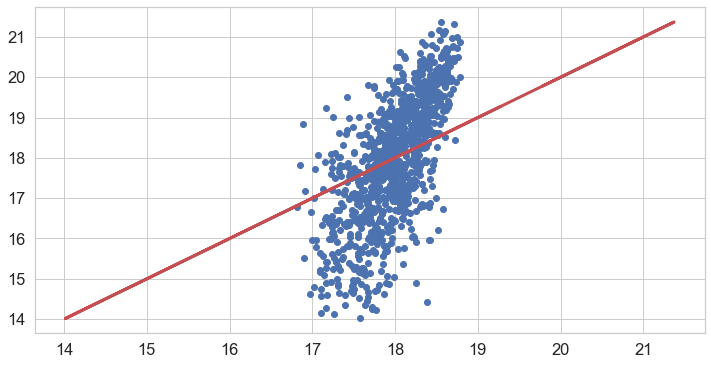

In [23]:
from sklearn.linear_model import ElasticNet

# define model
elastic_model = ElasticNet(random_state=42)

# fit model
elastic_model.fit(X_train, y_train.values.ravel())

# make a prediction
prediction_elastic_test = elastic_model.predict(X_test)
prediction_elastic_train = elastic_model.predict(X_train)


# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_elastic_train))
print("Explained Variance (R^2) on test \t:", elastic_model.score(X_train, y_train))
print("")

print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_elastic_test))
print("Explained Variance (R^2) on test \t:", elastic_model.score(X_test, y_test))


# plot graph
f = plt.figure(figsize=(12,6))
plt.scatter(prediction_elastic_test,y_test)
plt.plot(y_test,y_test,'r-',linewidth=3)
plt.show()

# Comparison

In [24]:
y_test_pred = LinearReg.predict(X_test)
print("Prediction performance --- Linear Regression Model:")
# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) \t:", LinearReg.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Explained Variance (R^2) \t:", LinearReg.score(X_test, y_test))

print()

print("Prediction performance --- Ridge Regression Model:")
# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, prediction_RR_train))
print("Explained Variance (R^2) \t:", model_RR.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, prediction_RR_test))
print("Explained Variance (R^2) \t:", model_RR.score(X_test, y_test))

print()

print("Prediction performance --- LASSO Regression Model:")
# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, prediction_LAR_train))
print("Explained Variance (R^2) \t:", model_LAR.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, prediction_LAR_test))
print("Explained Variance (R^2) \t:", model_LAR.score(X_test, y_test))

print()

print("Prediction performance --- Elastic Net Regression Model:")
# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, prediction_elastic_train))
print("Explained Variance (R^2) \t:", elastic_model.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, prediction_elastic_test))
print("Explained Variance (R^2) \t:", elastic_model.score(X_test, y_test))

Prediction performance --- Linear Regression Model:
Performance on Train Data:
Mean Squared Error (MSE) 	: 1.2591442396008536
Explained Variance (R^2) 	: 0.45461628380381325
Performance on Test Data:
Mean Squared Error (MSE) 	: 1.2478027727059546
Explained Variance (R^2) 	: 0.46625595705810996

Prediction performance --- Ridge Regression Model:
Performance on Train Data:
Mean Squared Error (MSE) 	: 1.259144319545772
Explained Variance (R^2) 	: 0.4546162491765995
Performance on Test Data:
Mean Squared Error (MSE) 	: 1.2478145019437803
Explained Variance (R^2) 	: 0.46625093991040467

Prediction performance --- LASSO Regression Model:
Performance on Train Data:
Mean Squared Error (MSE) 	: 2.0997521126366863
Explained Variance (R^2) 	: 0.09051673806361782
Performance on Test Data:
Mean Squared Error (MSE) 	: 2.125003404979749
Explained Variance (R^2) 	: 0.09103591252681864

Prediction performance --- Elastic Net Regression Model:
Performance on Train Data:
Mean Squared Error (MSE) 	: 1.650

# Prediction of Response based on the Predictor

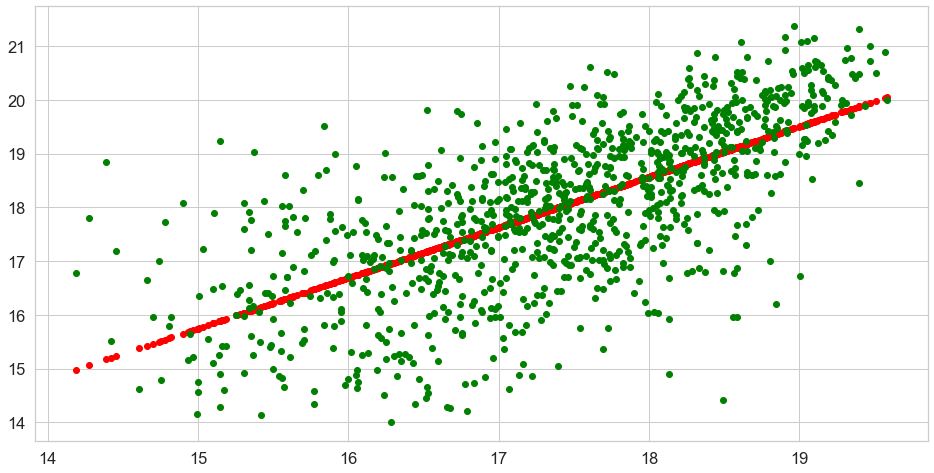

In [25]:
# Predict Revenue values corresponding to Budget
y_test_pred = LinearReg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test_pred, color = "red")
plt.scatter(X_test, y_test, color = "green")

plt.show()


In [26]:
# Compute R^2 & MSE on the test set
print("Performance on Test Data:")
print("Explained Variance (R^2) \t:", LinearReg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Performance on Test Data:
Explained Variance (R^2) 	: 0.46625595705810996
Mean Squared Error (MSE) 	: 1.2478027727059546


# Predicting Revenue using Popularity

In [27]:
movie_data["POPULARITY"].describe()

count    4060.000000
mean       22.130783
std        24.741996
min         0.600000
25%        11.267500
50%        15.905000
75%        24.784500
max       641.633000
Name: POPULARITY, dtype: float64

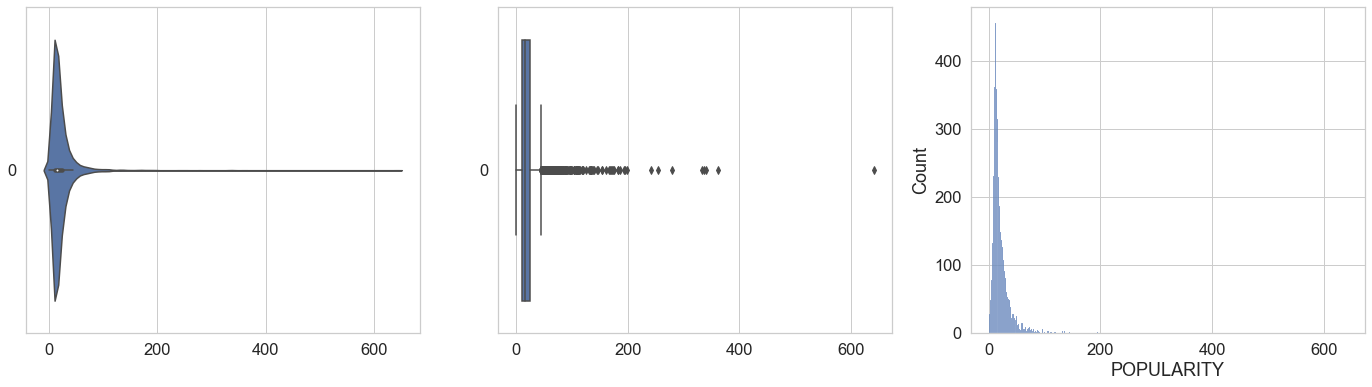

In [28]:
Uni_Variate(movie_data["POPULARITY"])

<AxesSubplot:xlabel='POPULARITY', ylabel='Count'>

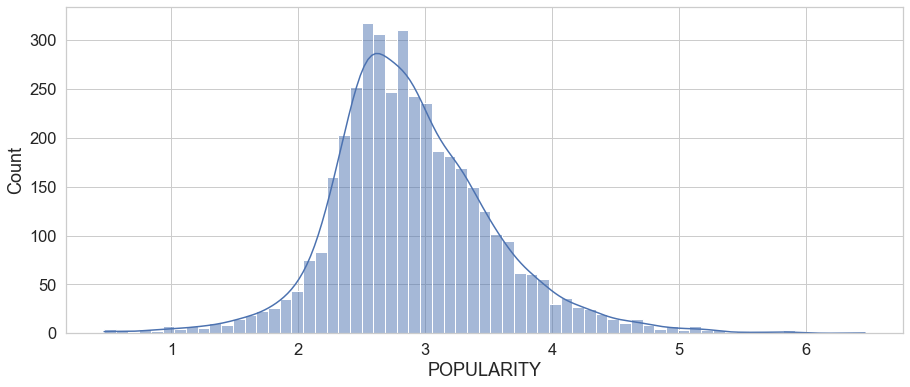

In [29]:
movie_data["POPULARITY"] = np.log(movie_data["POPULARITY"] + 1)

f = plt.figure(figsize=(15,6))

sb.histplot(movie_data["POPULARITY"], kde=True)

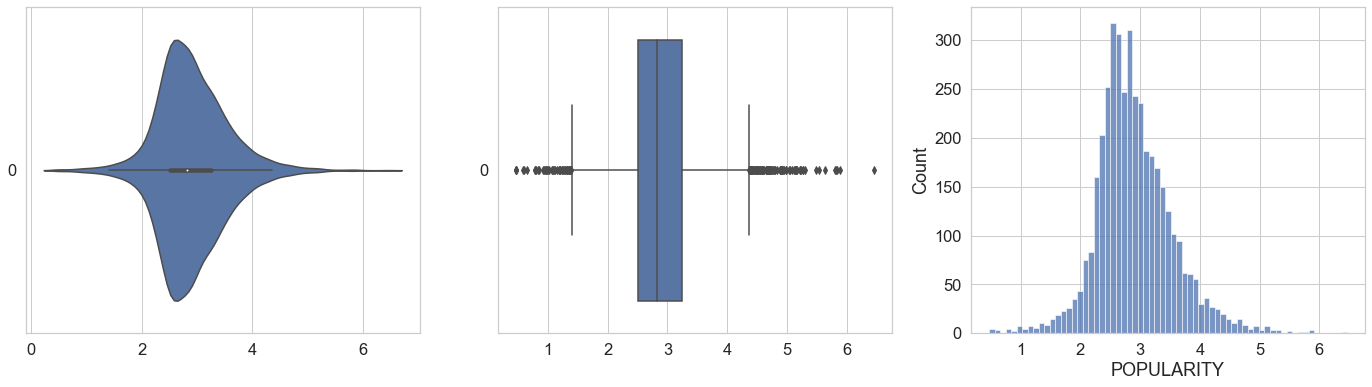

In [30]:
Uni_Variate(movie_data["POPULARITY"])

<Figure size 1728x288 with 0 Axes>

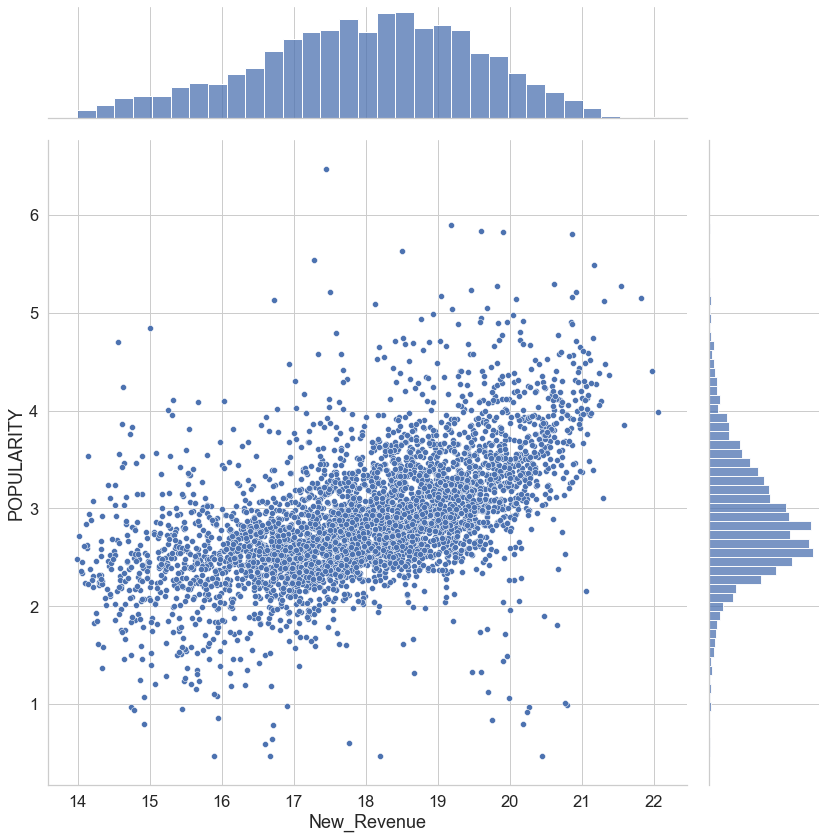

In [31]:
Bi_Variate(movie_data, 'New_Revenue', "POPULARITY")

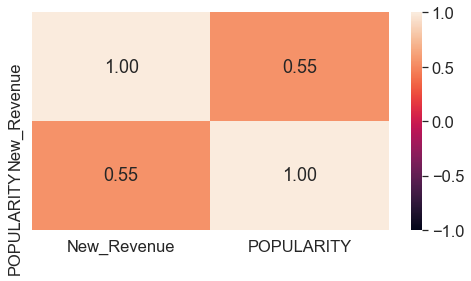

In [32]:
Correlation(movie_data, 'New_Revenue', "POPULARITY")

# LINEAR REGRESSION

In [33]:
# Extract Response and Predictors
y = pd.DataFrame(movie_data['New_Revenue'])
X = pd.DataFrame(movie_data['POPULARITY'])

# Split the Dataset into random Train and Test
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", train_x.shape, train_y.shape)
print("Test Set  :", test_x.shape, test_y.shape)

Train Set : (3045, 1) (3045, 1)
Test Set  : (1015, 1) (1015, 1)


In [34]:
LinearReg.fit(train_x, train_y)
print('Intercept : b = ', LinearReg.intercept_)
print('Coefficients : a = ', LinearReg.coef_)

Intercept : b =  [14.22414939]
Coefficients : a =  [[1.30311399]]


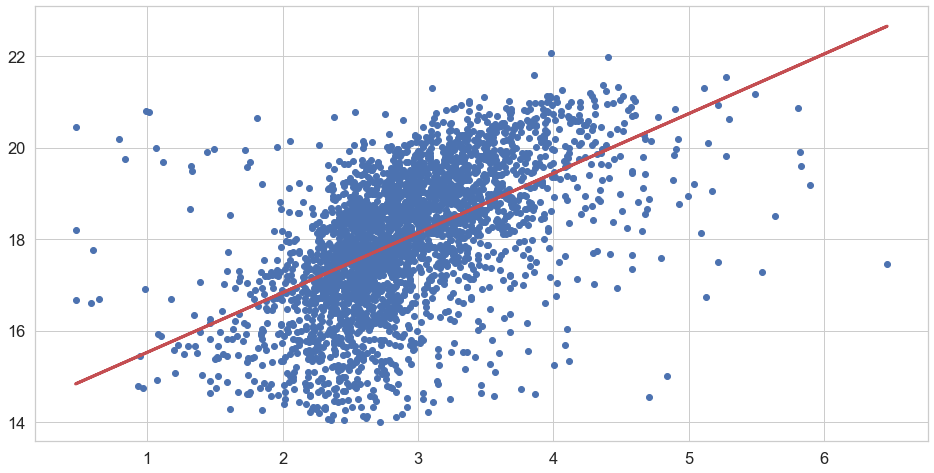

In [35]:
# Formula for the Regression line
regline_x = train_x
regline_y = LinearReg.intercept_ + LinearReg.coef_ * train_x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(train_x, train_y)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Goodness of Fit of the Linear Regression Model

In [36]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", LinearReg.score(train_x, train_y))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
test_y_pred = LinearReg.predict(train_x)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y, test_y_pred))

Explained Variance (R^2) 	: 0.3024924214578303
Mean Squared Error (MSE) 	: 1.6282226365916015


# Prediction of Response based on the Predictor

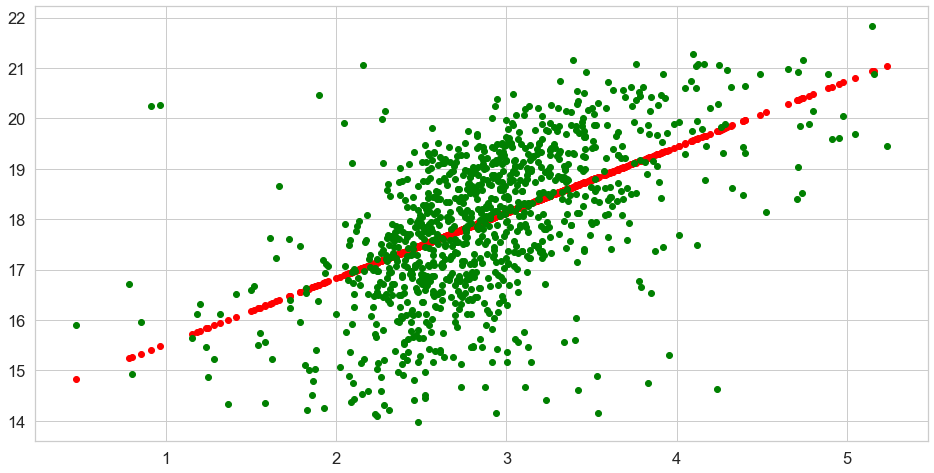

In [37]:
# Predict Revenue values corresponding to Budget
test_y_pred = LinearReg.predict(test_x)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(test_x, test_y_pred, color = "red")
plt.scatter(test_x, test_y, color = "green")

plt.show()

# Predicting Revenue using Runtime

In [38]:
movie_data["RUNTIME"].describe()

count    4060.000000
mean      110.315025
std        19.370470
min        48.000000
25%        97.000000
50%       107.000000
75%       121.000000
max       254.000000
Name: RUNTIME, dtype: float64

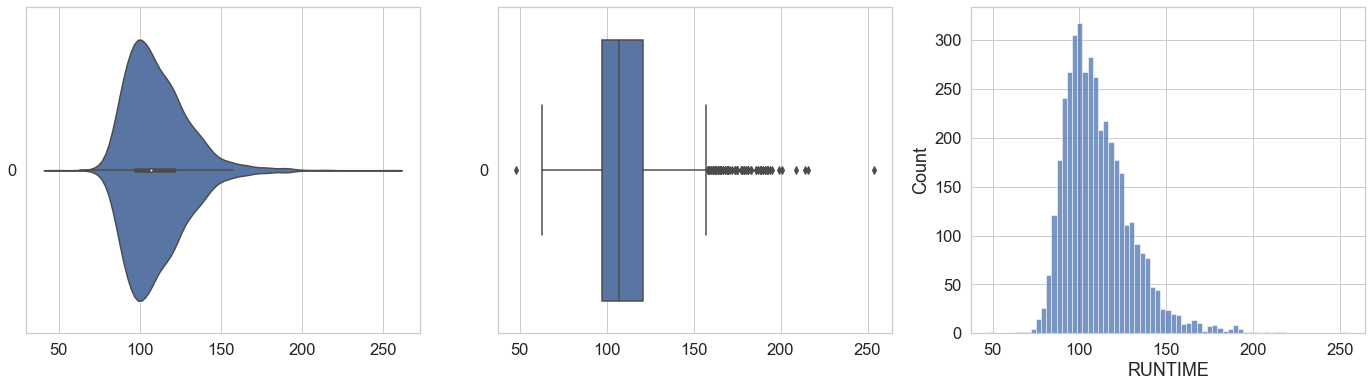

In [39]:
Uni_Variate(movie_data["RUNTIME"])

<Figure size 1728x288 with 0 Axes>

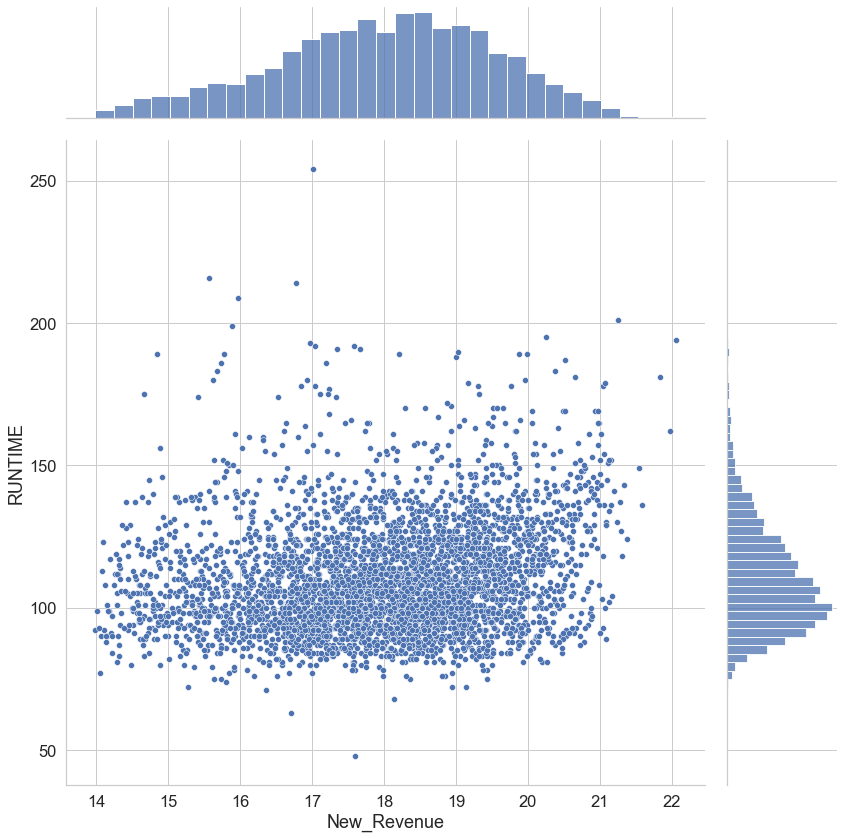

In [40]:
Bi_Variate(movie_data, 'New_Revenue', "RUNTIME")

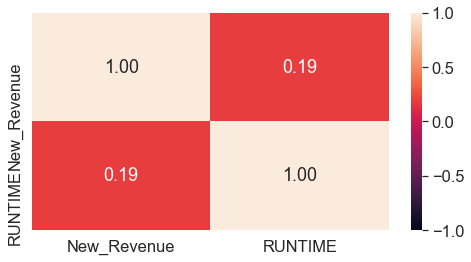

In [41]:
Correlation(movie_data, 'New_Revenue', "RUNTIME")

# LINEAR REGRESSION

In [42]:
# Extract Response and Predictors
y = pd.DataFrame(movie_data['New_Revenue'])
X = pd.DataFrame(movie_data['RUNTIME'])

# Split the Dataset into random Train and Test
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", train_x.shape, train_y.shape)
print("Test Set  :", test_x.shape, test_y.shape)

Train Set : (3045, 1) (3045, 1)
Test Set  : (1015, 1) (1015, 1)


In [43]:
LinearReg.fit(train_x, train_y)
print('Intercept : b = ', LinearReg.intercept_)
print('Coefficients : a = ', LinearReg.coef_)

Intercept : b =  [16.4223393]
Coefficients : a =  [[0.01420451]]


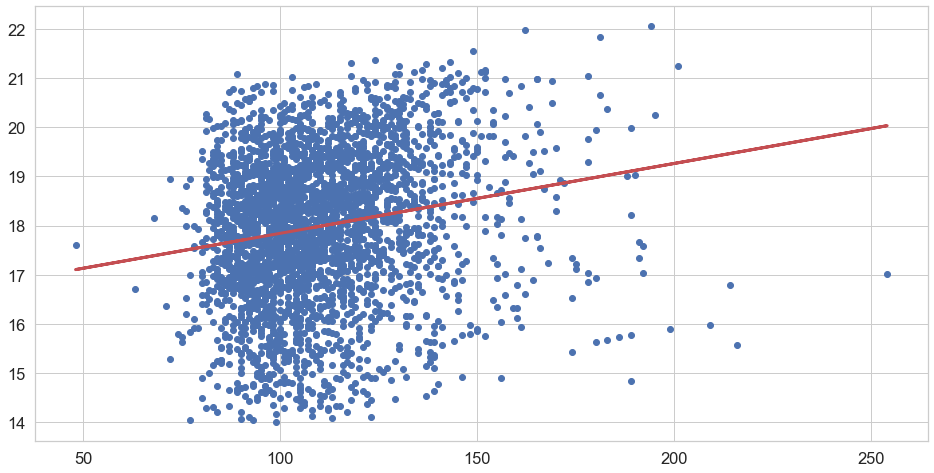

In [44]:
# Formula for the Regression line
regline_x = train_x
regline_y = LinearReg.intercept_ + LinearReg.coef_ * train_x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(train_x, train_y)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Goodness of Fit of the Linear Regression Model

In [45]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", LinearReg.score(train_x, train_y))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
test_y_pred = LinearReg.predict(train_x)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y, test_y_pred))

Explained Variance (R^2) 	: 0.03380740327768428
Mean Squared Error (MSE) 	: 2.217255905200387


# Prediction of Response based on the Predictor

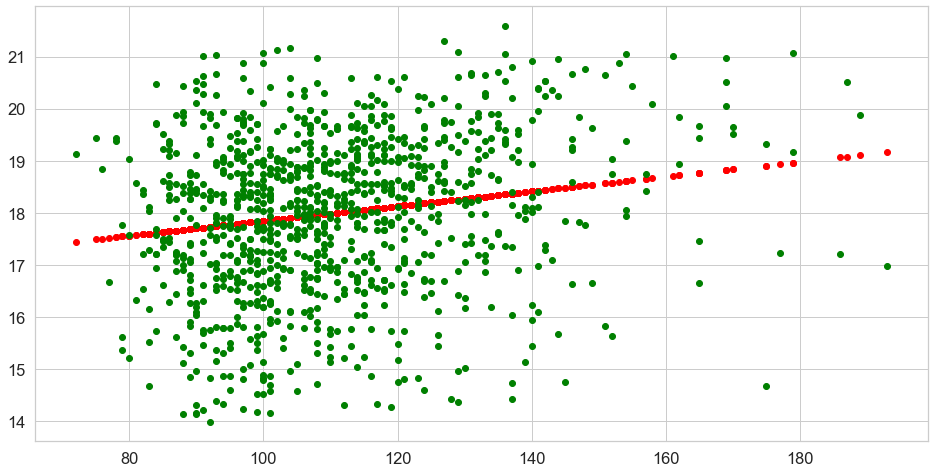

In [46]:
# Predict Revenue values corresponding to Budget
test_y_pred = LinearReg.predict(test_x)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(test_x, test_y_pred, color = "red")
plt.scatter(test_x, test_y, color = "green")

plt.show()

# PREDICT REVENUE VALUE USING  VOTE_AVERAGE

In [47]:
movie_data.sort_values(by = 'VOTE_AVERAGE', ascending = False)
movie_data.head()

,BUDGET,OVERVIEW,POPULARITY,REVENUE,RUNTIME,VOTE_AVERAGE,VOTE_COUNT,TAGLINE,release_year,release_month,New_Budget,New_Revenue,New_Vote_Avg
0,16.648724,A soldier and his team battle hordes of post-a...,6.465574,17.395642,114.0,7.1,602,Escape The Apocalypse,2020,7,16.706993,17.453911,7
1,18.132999,"Harley Quinn joins forces with a singer, an as...",5.892299,19.123077,109.0,7.2,6022,Mind Over Mayhem,2020,5,18.191268,19.181346,7
2,18.315320,Marcus and Mike are forced to confront new thr...,5.824069,19.853560,124.0,7.2,5392,Ride together. Die together.,2020,1,18.373589,19.911829,7
3,17.553180,"After he and his wife are murdered, marine Ray...",5.540852,17.224484,110.0,7.0,3216,Being a superhero is in his blood,2020,5,17.611449,17.282753,7
4,19.113828,"In a suburban fantasy world, two teenage elf b...",5.636467,18.451999,102.0,7.9,3243,Their quest begineth.,2020,2,19.172097,18.510268,8


In [48]:
movie_data["VOTE_AVERAGE"].describe()

count    4060.000000
mean        6.394852
std         0.853987
min         0.000000
25%         5.900000
50%         6.400000
75%         7.000000
max         8.700000
Name: VOTE_AVERAGE, dtype: float64

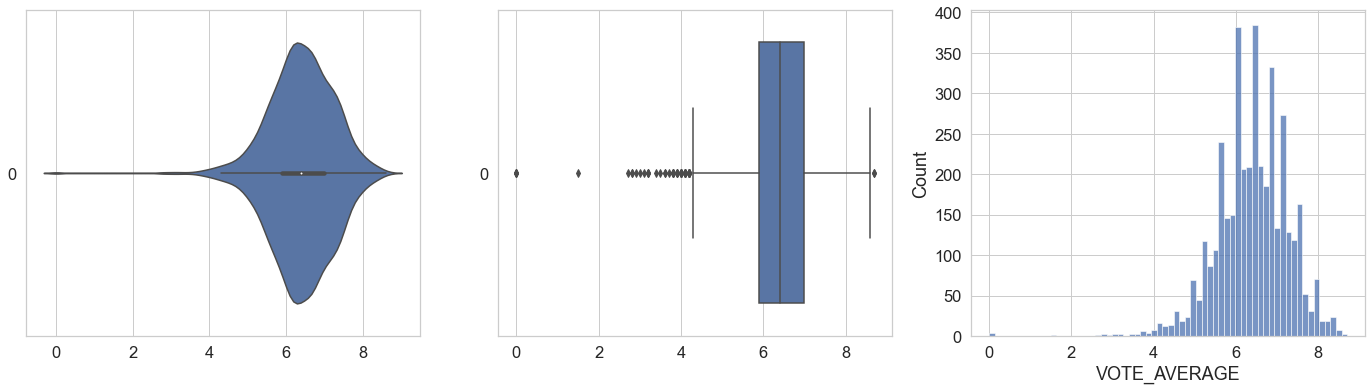

In [49]:
Uni_Variate(movie_data["VOTE_AVERAGE"])

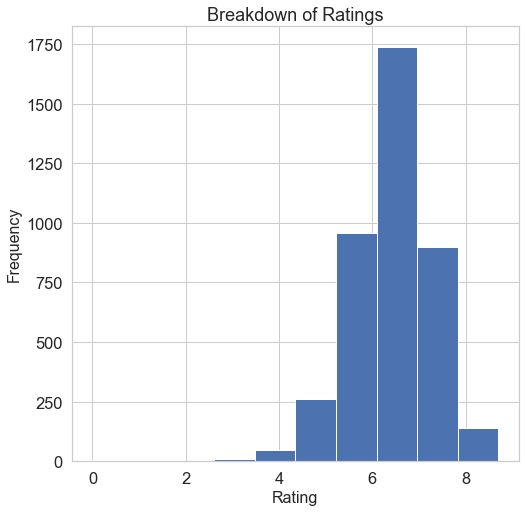

In [50]:
movie_data['VOTE_AVERAGE'].plot(kind='hist', figsize = (8,8));
plt.title('Breakdown of Ratings', fontsize = 18)
plt.xlabel('Rating', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16);

In [51]:
revenue_vote= pd.DataFrame(movie_data, columns= ['New_Revenue','VOTE_AVERAGE'])

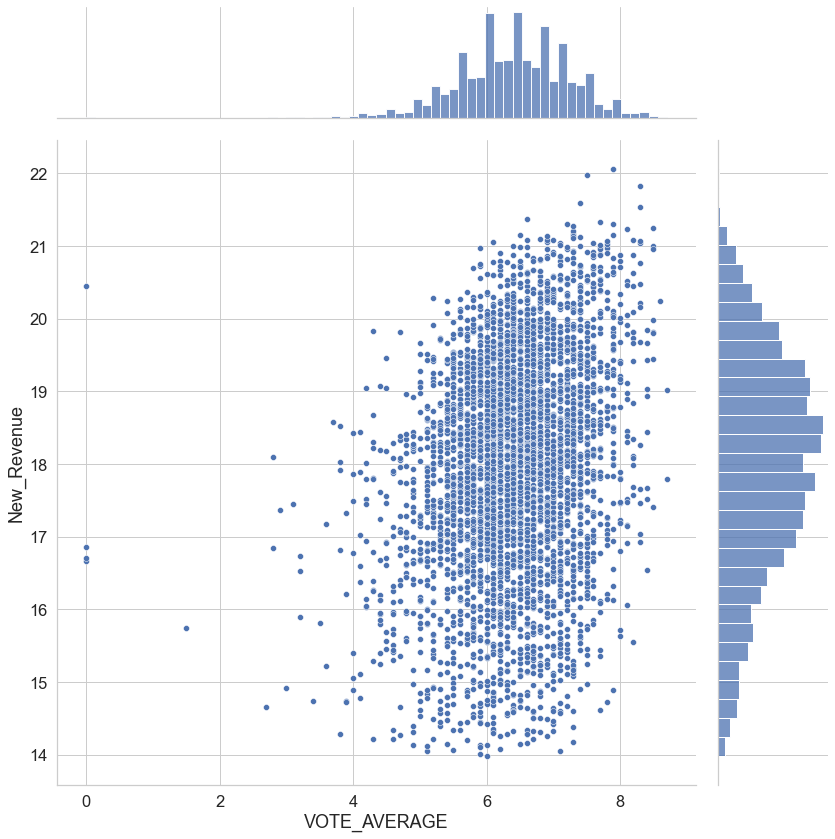

In [52]:
sb.jointplot(data = revenue_vote, x = "VOTE_AVERAGE", y = "New_Revenue", height = 12)

In [53]:
revenue_vote.describe()

,New_Revenue,VOTE_AVERAGE
count,4060.000000,4060.000000
mean,17.982224,6.394852
std,1.522048,0.853987
min,13.987391,0.000000
25%,16.975362,5.900000
50%,18.109680,6.400000
75%,19.101363,7.000000
max,22.053321,8.700000


In [54]:
revenue_vote.sort_values(by = 'VOTE_AVERAGE', ascending = True)

,New_Revenue,VOTE_AVERAGE
3922,16.856832,0.0
4035,20.453031,0.0
3690,16.667280,0.0
3916,16.708143,0.0
3156,15.741638,1.5
...,...,...
362,20.963429,8.5
464,17.409006,8.5
431,20.246956,8.6
361,17.789511,8.7


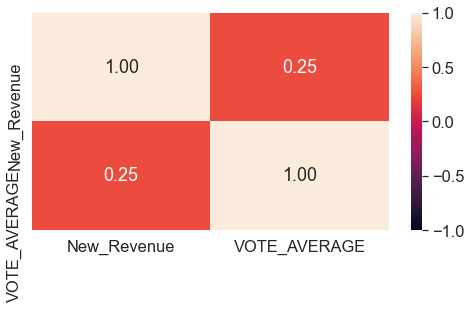

In [55]:
Correlation(revenue_vote, 'New_Revenue', "VOTE_AVERAGE")

In [56]:
# Extract Response and Predictors
y = pd.DataFrame(revenue_vote['New_Revenue'])
X = pd.DataFrame(revenue_vote["VOTE_AVERAGE"])

# Split the Dataset into random Train and Test
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", train_x.shape, train_y.shape)
print("Test Set  :", test_x.shape, test_y.shape)

Train Set : (3045, 1) (3045, 1)
Test Set  : (1015, 1) (1015, 1)


In [57]:
LinearReg.fit(train_x, train_y)
print('Intercept : b = ', LinearReg.intercept_)
print('Coefficients : a = ', LinearReg.coef_)

Intercept : b =  [15.09116318]
Coefficients : a =  [[0.44956705]]


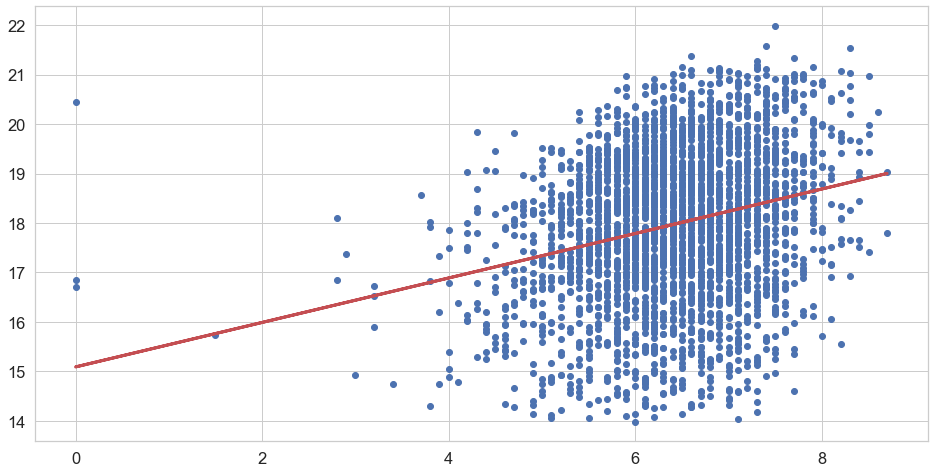

In [58]:
# Formula for the Regression line
regline_x = train_x
regline_y = LinearReg.intercept_ + LinearReg.coef_ * train_x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(train_x, train_y)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Goodness of Fit of the Linear Regression Model

In [59]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", LinearReg.score(train_x, train_y))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
train_y_pred = LinearReg.predict(train_x)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y, train_y_pred))

Explained Variance (R^2) 	: 0.06389024664892007
Mean Squared Error (MSE) 	: 2.1605859760938713


# Prediction of Response based on the Predictor

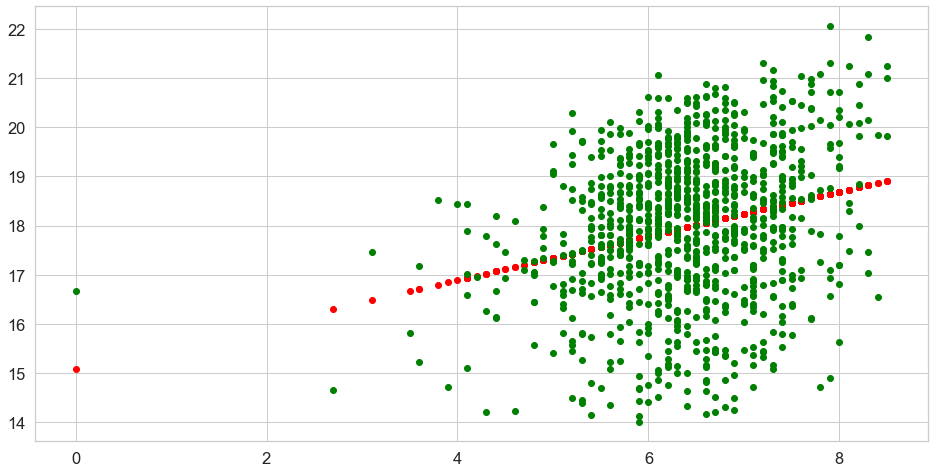

In [60]:
# Predict Revenue values corresponding to New_Vote_Avg
test_y_pred = LinearReg.predict(test_x)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(test_x, test_y_pred, color = "red")
plt.scatter(test_x, test_y, color = "green")

plt.show()